In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("./data/pokemon.csv", index_col=0, encoding="latin")

In [113]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

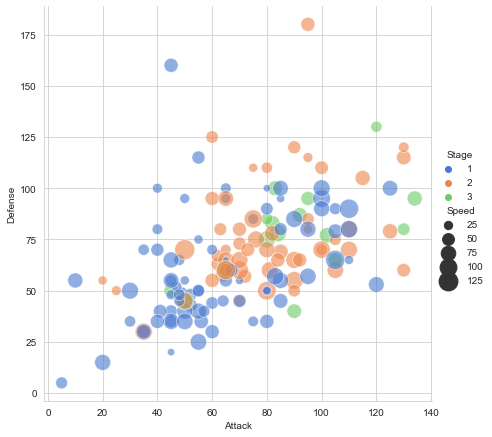

In [106]:

# print(sns.__version__)
# sns.lmplot(x="Attack", y="Defense", data=df, fit_reg=False, hue='Stage')

# Relational plot
sns.relplot(x="Attack", y="Defense", hue="Stage", size="Speed",
            sizes=(40, 400), alpha=.6, palette="muted",
            height=6, data=df)

# plt.ylim(-50, None) # where to start the plot from

<AxesSubplot:>

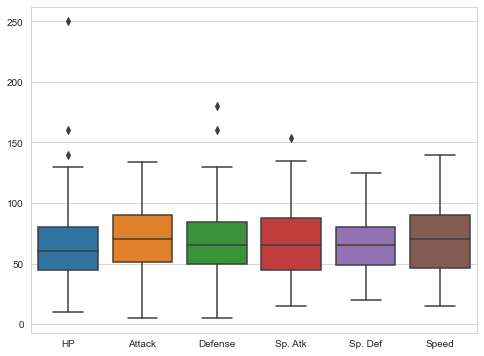

In [130]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df)
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
plt.figure(figsize=(8, 6))
sns.boxplot(data=stats_df)

In [110]:
# fix some of the data (in other cases it might be cleaned entirely, but here we can google it)
df = df.fillna(value={'Type 2': 'None'}) # replace Nan of Type 2 with None

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True


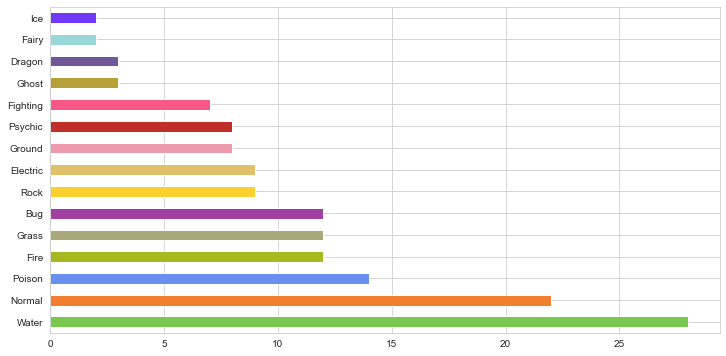

In [114]:
plt.figure(figsize=(12, 6))
df["Type 1"].value_counts().plot(kind="barh", color=pkmn_type_colors)
df[df['Sp. Atk'] > 140]

<AxesSubplot:>

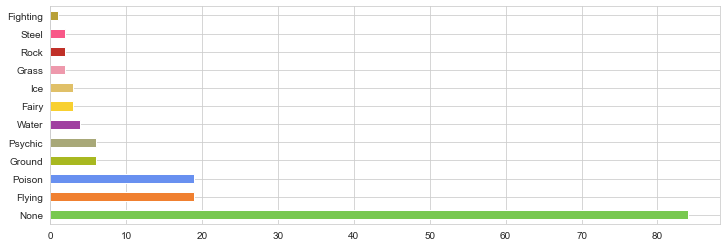

In [115]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g', 'm'][::-1]
plt.figure(figsize=(12, 4))
df["Type 2"].value_counts().plot(kind="barh", color=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

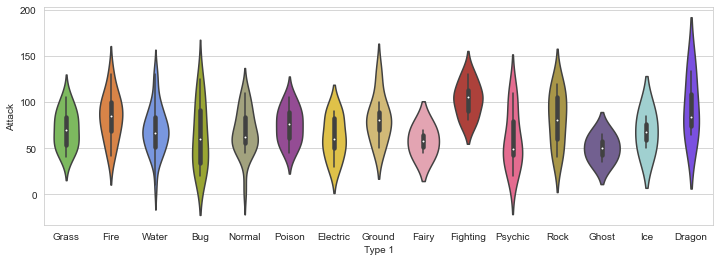

In [120]:
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12, 4))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

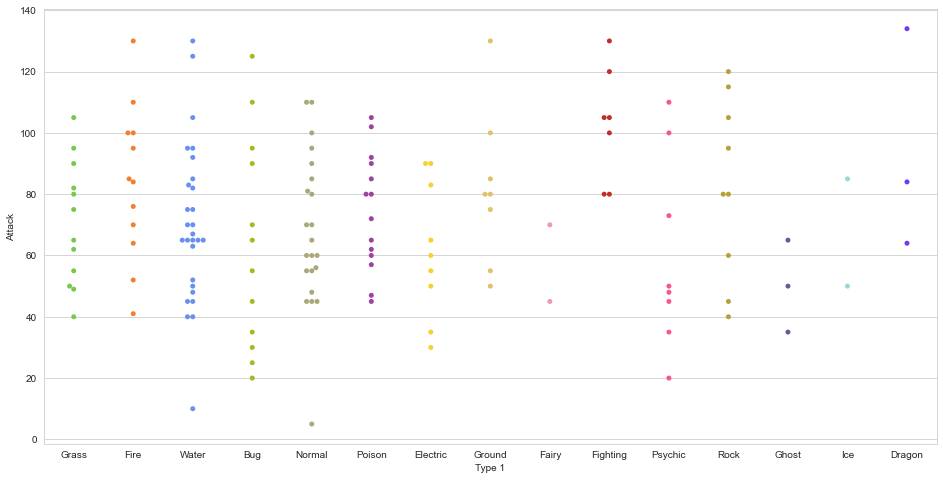

In [125]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(16, 8))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

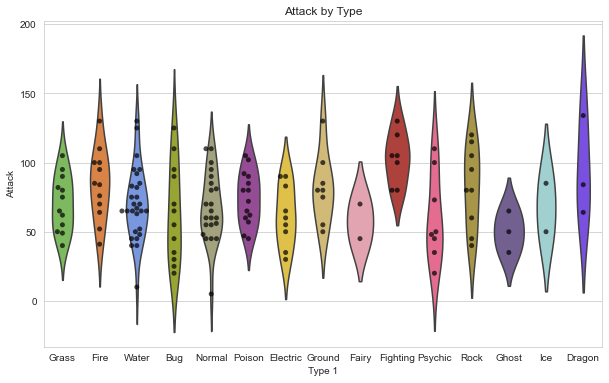

In [131]:
# plot violins with swarms
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1', y='Attack',  data=df, inner=None, palette=pkmn_type_colors)

# Swarm plot with Pokemon color palette

sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=.7)

plt.title('Attack by Type')

/Users/nikolashahpazov/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nikolashahpazov/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Stat', ylabel='value'>

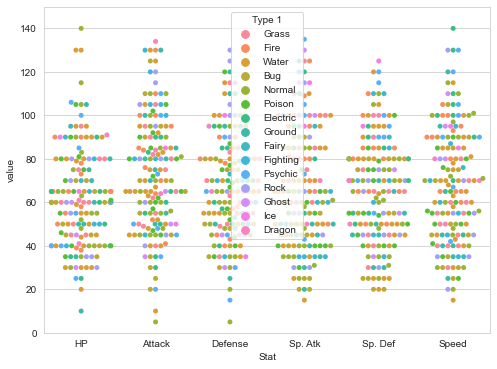

In [162]:

melted_df = pd.melt(stats_df, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")
melted_df[melted_df["Name"] == "Bulbasaur"]
plt.figure(figsize=(8, 6))
plt.ylim(0, 150)
sns.swarmplot(data=melted_df, x="Stat", y="value",hue='Type 1')
# no idea what this plot ilustrates

In [205]:
melted_df[melted_df["Name"] == "Bulbasaur"]

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


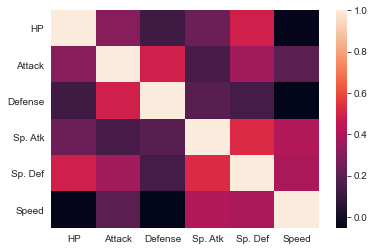

In [168]:
# correlation matrix and heatmap
corr = stats_df.corr()
sns.heatmap(corr)
corr

<AxesSubplot:xlabel='Speed', ylabel='Density'>

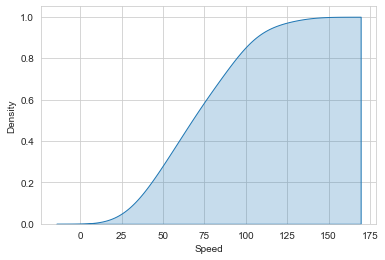

In [210]:
# histogram plot
# sns.histplot(df.Speed)
sns.kdeplot(df.Speed, shade=True, cumulative=True) # kernel density estimation of the cummulative function

<AxesSubplot:xlabel='Type 1', ylabel='count'>

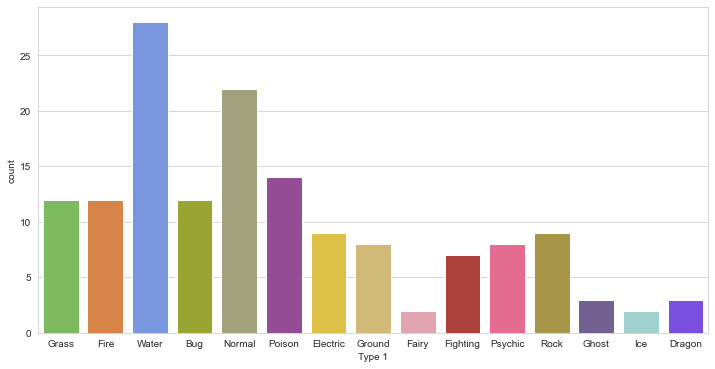

In [191]:
# count plot
plt.figure(figsize=(12, 6))
# df["Type 1"].value_counts().plot(kind="bar")
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

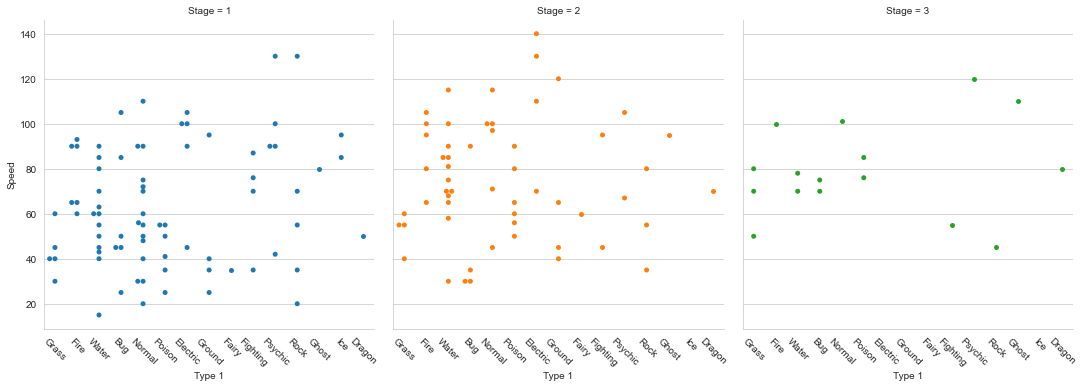

In [213]:
# factor plot
g = sns.catplot(x="Type 1", y="Speed", data=df, hue="Stage", col="Stage", kind="swarm")
g.set_xticklabels(rotation=-45) # rotates the labels

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

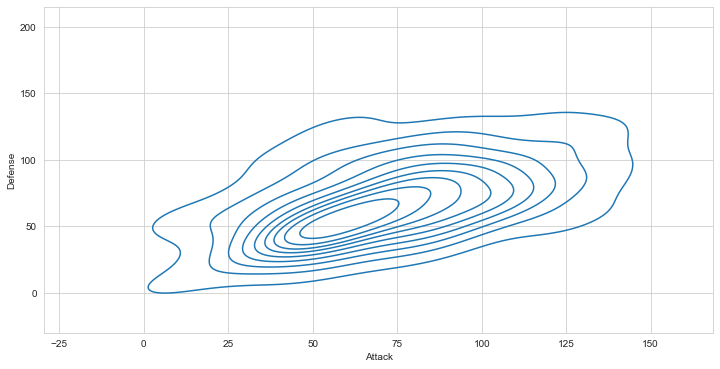

In [202]:
# kde density plots
plt.figure(figsize=(12, 6))
# sns.kdeplot(x="Sp. Def", y="HP", data=df)
sns.kdeplot(x="Attack", y="Defense", data=df)

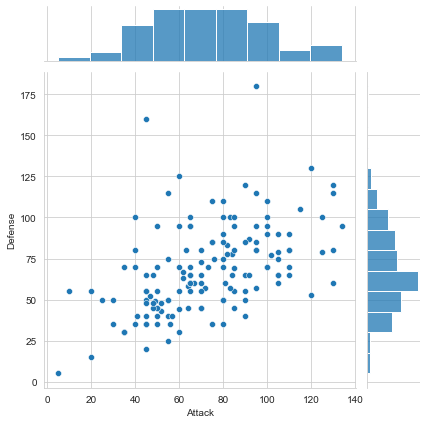

In [201]:
# joint plot
sns.jointplot(x='Attack', y='Defense', data=df)